In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from pylab import *

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

In [3]:
def percolation_matrix(p, L):
    """Creates and returns a labeled percolation matrix, and the number of clusters."""
    prob_matrix = rand(L, L)
    perc_matrix = prob_matrix < p
    label_perc_matrix, n_clusters = bwlabel(perc_matrix)
    return label_perc_matrix, n_clusters, perc_matrix

In [4]:
%%time

def find_ppie(search_area, L, x, simulations_per_p=1000):
    Pie = zeros(len(search_area))
    
    for i, prob in enumerate(search_area):
        simulation_i = 0
        
        while simulations_per_p > simulation_i:
            lw, num, z = percolation_matrix(prob, L)
            
            perc_h = intersect1d(lw[0, :], lw[-1, :])
            perc_v = intersect1d(lw[:, 0], lw[:, -1])
            perc = concatenate((perc_h[where(perc_h > 0)], perc_v[where(perc_v > 0)]), axis=0)
            perc = unique(perc)
            
            if len(perc) > 0:
                Pie[i] += 1
            simulation_i += 1    
            
    Pie[:] /= simulations_per_p
    closest_value = argmin(abs(Pie - x))
    error = (Pie - x)[closest_value]
    ppiex = search_area[closest_value]    
    return ppiex, Pie, error


search_area = array([0.5 + 0.0005*i for i in range(200)])
L = 100
x = 0.3

print(search_area)
ppiex, Pie, error = find_ppie(search_area, L, x)
print(Pie)
print("ppiex computed with a error: {}".format(error))

[0.5    0.5005 0.501  0.5015 0.502  0.5025 0.503  0.5035 0.504  0.5045
 0.505  0.5055 0.506  0.5065 0.507  0.5075 0.508  0.5085 0.509  0.5095
 0.51   0.5105 0.511  0.5115 0.512  0.5125 0.513  0.5135 0.514  0.5145
 0.515  0.5155 0.516  0.5165 0.517  0.5175 0.518  0.5185 0.519  0.5195
 0.52   0.5205 0.521  0.5215 0.522  0.5225 0.523  0.5235 0.524  0.5245
 0.525  0.5255 0.526  0.5265 0.527  0.5275 0.528  0.5285 0.529  0.5295
 0.53   0.5305 0.531  0.5315 0.532  0.5325 0.533  0.5335 0.534  0.5345
 0.535  0.5355 0.536  0.5365 0.537  0.5375 0.538  0.5385 0.539  0.5395
 0.54   0.5405 0.541  0.5415 0.542  0.5425 0.543  0.5435 0.544  0.5445
 0.545  0.5455 0.546  0.5465 0.547  0.5475 0.548  0.5485 0.549  0.5495
 0.55   0.5505 0.551  0.5515 0.552  0.5525 0.553  0.5535 0.554  0.5545
 0.555  0.5555 0.556  0.5565 0.557  0.5575 0.558  0.5585 0.559  0.5595
 0.56   0.5605 0.561  0.5615 0.562  0.5625 0.563  0.5635 0.564  0.5645
 0.565  0.5655 0.566  0.5665 0.567  0.5675 0.568  0.5685 0.569  0.5695
 0.57 

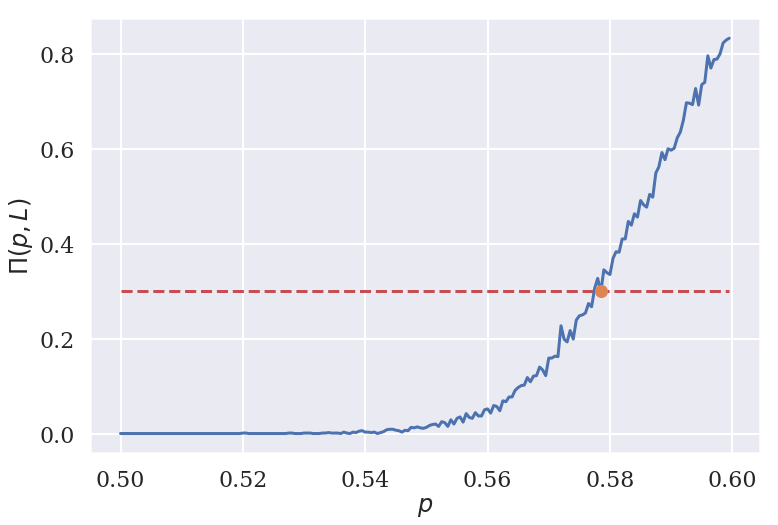

In [5]:
plot(search_area, Pie)
plot([ppiex], [x], 'o')
hlines(x, search_area[0], search_area[-1], 'r', '--')
xlabel(r"$p$")
ylabel(r"$\Pi (p, L)$")
show()

In [6]:
Ls = [25, 50, 100, 200, 400, 800]
xs = [0.3, 0.8]

ppiex_ = zeros((len(xs), len(Ls)))
search_area = array([0.55 + 0.0005*i for i in range(200)])


for i, x in enumerate(xs):
    for j, L in enumerate(Ls):
        ppiex, Pie, error = find_ppie(search_area, L, x)
        print("ppiex = {}, L = {}, x = {}, with absolute error {:.8g} for MCC = 1000".format(ppiex, L, x, error))
        ppiex_[i, j] = ppiex

ppiex = 0.5505, L = 25, x = 0.3, with absolute error -0.001 for MCC = 1000
ppiex = 0.5675, L = 50, x = 0.3, with absolute error -0.008 for MCC = 1000
ppiex = 0.577, L = 100, x = 0.3, with absolute error -0.009 for MCC = 1000
ppiex = 0.5835, L = 200, x = 0.3, with absolute error -0.007 for MCC = 1000
ppiex = 0.588, L = 400, x = 0.3, with absolute error 0.016 for MCC = 1000
ppiex = 0.5895, L = 800, x = 0.3, with absolute error -0.013 for MCC = 1000
ppiex = 0.611, L = 25, x = 0.8, with absolute error 0 for MCC = 1000
ppiex = 0.602, L = 50, x = 0.8, with absolute error 0.002 for MCC = 1000
ppiex = 0.5975, L = 100, x = 0.8, with absolute error 0 for MCC = 1000
ppiex = 0.5955, L = 200, x = 0.8, with absolute error -0.001 for MCC = 1000
ppiex = 0.595, L = 400, x = 0.8, with absolute error 0.016 for MCC = 1000
ppiex = 0.594, L = 800, x = 0.8, with absolute error 0.002 for MCC = 1000


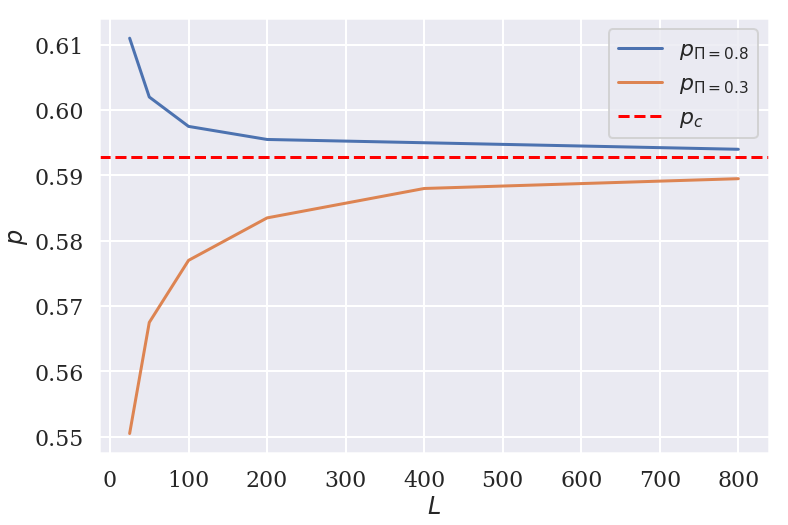

In [7]:
pc = 0.59275

fig = figure()

plot(Ls, ppiex_[1, :], label=r"$p_{\Pi=0.8}$")
plot(Ls, ppiex_[0, :], label=r"$p_{\Pi=0.3}$")
axhline(pc, c="red", ls='--', label=r"$p_c$")
    
ylabel(r"$p$")
xlabel(r"$L$")
legend()
show()

Found nu = 1.32471439893 and C_diff = 0.668113312077 using linear regression.


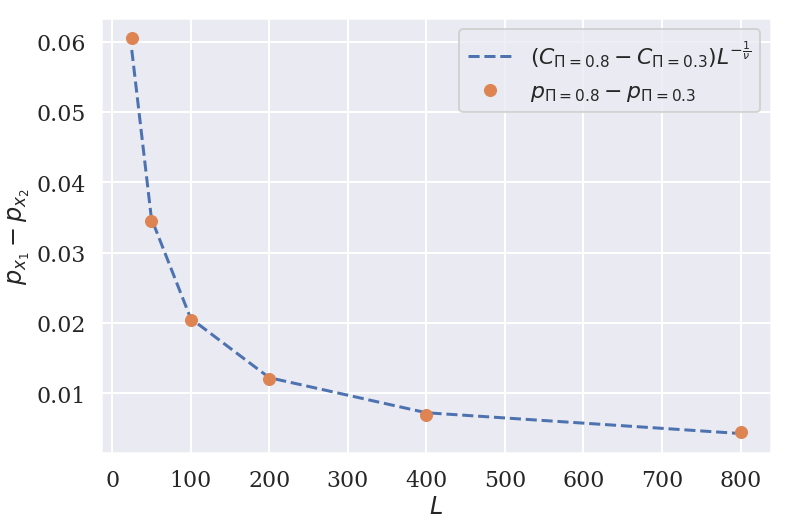

In [8]:
from scipy.stats import linregress

Ls = array(Ls)
px_diff = ppiex_[1, :] - ppiex_[0, :]
slope, intercept, _, _, _ = linregress(log(Ls), log(px_diff))

C_diff = exp(intercept)
nu = - 1.0 / slope

print("Found nu = {} and C_diff = {} using linear regression.".format(nu, C_diff))

plot(Ls, C_diff*Ls**(-(1.0 / nu)), '--', label=r"$(C_{\Pi = 0.8} - C_{\Pi = 0.3})L^{-\frac{1}{\nu}}$")
plot(Ls, px_diff, "o", label=r"$p_{\Pi = 0.8} - p_{\Pi = 0.3}$")

xlabel(r"$L$")
ylabel(r"$p_{x_1} - p_{x_2}$")
legend()
show()

ppiex = pc => L**(-1/nu) = 0 so the intercepts gives the solution:
pppiex = 0.3 gives by linear regression p_c = 0.592623781361
pppiex = 0.8 gives by linear regression p_c = 0.592004883642


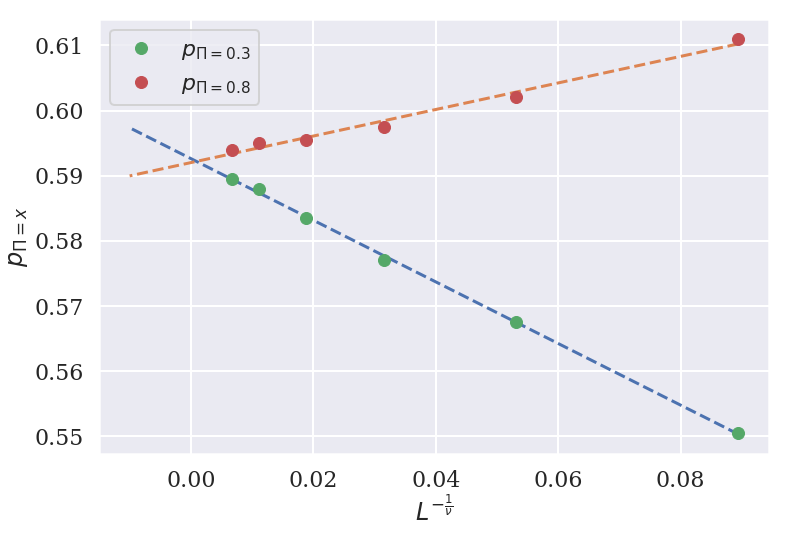

In [9]:
from scipy.stats import linregress

ppiexs = [0.3, 0.8]
nu = 4.0/3.0

Lnu = Ls**(-1.0/nu)
Lnu_extd = concatenate((Lnu, [0, -0.01]))
intercepts = zeros(2)

print("ppiex = pc => L**(-1/nu) = 0 so the intercepts gives the solution:")
for i in range(2):
    slope, intercepts[i], _, _, _ = linregress(Lnu, ppiex_[i])
    plot(Lnu_extd, slope*Lnu_extd + intercepts[i], '--')
    print("pppiex = {} gives by linear regression p_c = {}".format(ppiexs[i], intercepts[i]))
    
plot(Lnu, ppiex_[0], 'o', label=r"$p_{\Pi=0.3}$")
plot(Lnu, ppiex_[1], 'o', label=r"$p_{\Pi=0.8}$")

xlabel(r"$L^{-\frac{1}{\nu}}$")
ylabel(r"$p_{\Pi = x}$")
legend()
show()